In [243]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
sns.set(style="darkgrid")


import numpy as np

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import r2_score

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

bikesharedf = pd.read_csv(r'C:\Users\deepa\OneDrive\Documents\Upgrad\MultiLinearRegAssg\day.csv')





In [244]:
#Data Cleaning and Prep

In [245]:
#Removing columns with null values
bikesharedf = bikesharedf.dropna(axis=1)


In [246]:
#Removing unneccessary and redundant columns

bikesharedf = bikesharedf.drop(['temp', 'holiday','casual','registered','instant','dteday','mnth'], axis = 1)

##We do not need both temp and atemp. 
###We should be able to predict the temperature's influence with feels like temp which is atemp

##We can use workingday column to map the influence of holidays on the count. So, column 'holiday' can be removed

##Casual and registered user counts can be reduced as we can not consider them as features

In [247]:


bikesharedf.shape
bikesharedf.describe()
bikesharedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   atemp       730 non-null    float64
 6   hum         730 non-null    float64
 7   windspeed   730 non-null    float64
 8   cnt         730 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 51.5 KB


In [248]:
bikesharedf.head(10)

,season,yr,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,3,1,1,11.46350,43.6957,12.522300,1600
5,1,0,4,1,1,11.66045,51.8261,6.000868,1606
6,1,0,5,1,2,10.44195,49.8696,11.304642,1510
7,1,0,6,0,2,8.11270,53.5833,17.875868,959
8,1,0,0,0,1,5.80875,43.4167,24.250650,822
9,1,0,1,1,1,7.54440,48.2917,14.958889,1321


In [249]:
#Updating variables to categorical variables

bikesharedf['season'] = bikesharedf['season'].map({1 : 'spring', 2 : 'summer', 3: 'fall', 4: 'winter'})
bikesharedf['weathersit'] = bikesharedf['weathersit'].map({1 : 'VeryGoodWeather', 2 : 'GoodWeather', 3: 'AverageWeather', 4: 'PoorWeather'})


In [250]:
bikesharedf['weekday'] = bikesharedf['weekday'].map({0 : 'Sunday'
                                                     , 1 : 'Monday'
                                                     , 2: 'Tuesday'
                                                     , 3: 'Wednesday'
                                                    , 4 : 'Thursday'
                                                     , 5: 'Friday'
                                                     , 6: 'Saturday'})


In [251]:

bikesharedf.head(10)

,season,yr,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Saturday,0,GoodWeather,18.18125,80.5833,10.749882,985
1,spring,0,Sunday,0,GoodWeather,17.68695,69.6087,16.652113,801
2,spring,0,Monday,1,VeryGoodWeather,9.47025,43.7273,16.636703,1349
3,spring,0,Tuesday,1,VeryGoodWeather,10.60610,59.0435,10.739832,1562
4,spring,0,Wednesday,1,VeryGoodWeather,11.46350,43.6957,12.522300,1600
5,spring,0,Thursday,1,VeryGoodWeather,11.66045,51.8261,6.000868,1606
6,spring,0,Friday,1,GoodWeather,10.44195,49.8696,11.304642,1510
7,spring,0,Saturday,0,GoodWeather,8.11270,53.5833,17.875868,959
8,spring,0,Sunday,0,VeryGoodWeather,5.80875,43.4167,24.250650,822
9,spring,0,Monday,1,VeryGoodWeather,7.54440,48.2917,14.958889,1321


In [252]:
#Univariate and Bivariate Analysis

<Axes: xlabel='workingday', ylabel='cnt'>

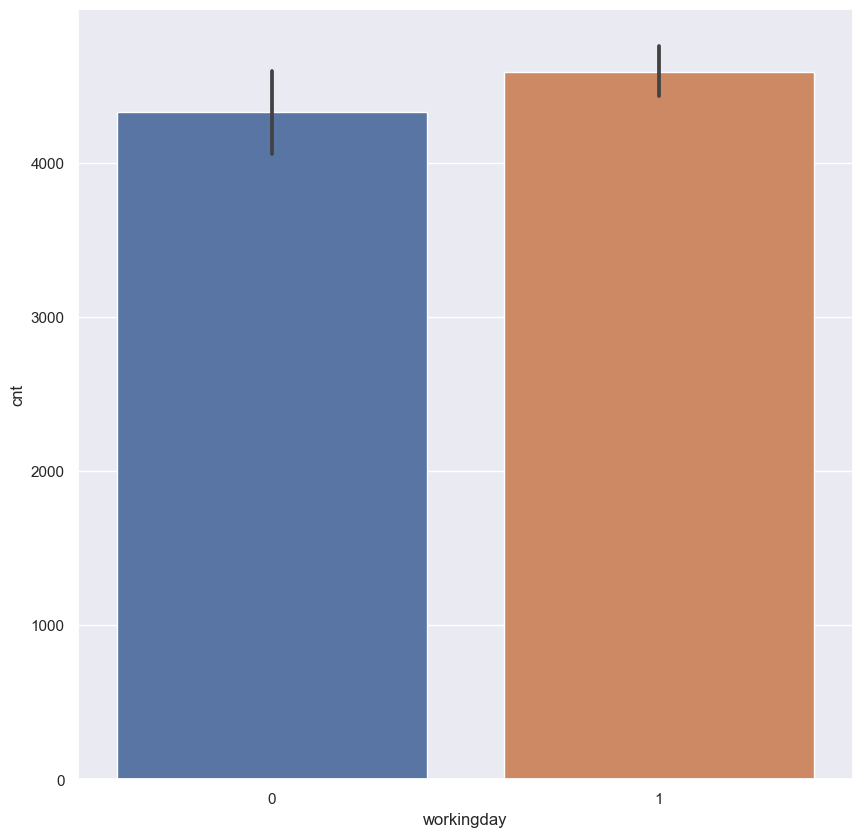

In [253]:
sns.barplot(data = bikesharedf,x='workingday', y='cnt')

<Axes: xlabel='weekday', ylabel='cnt'>

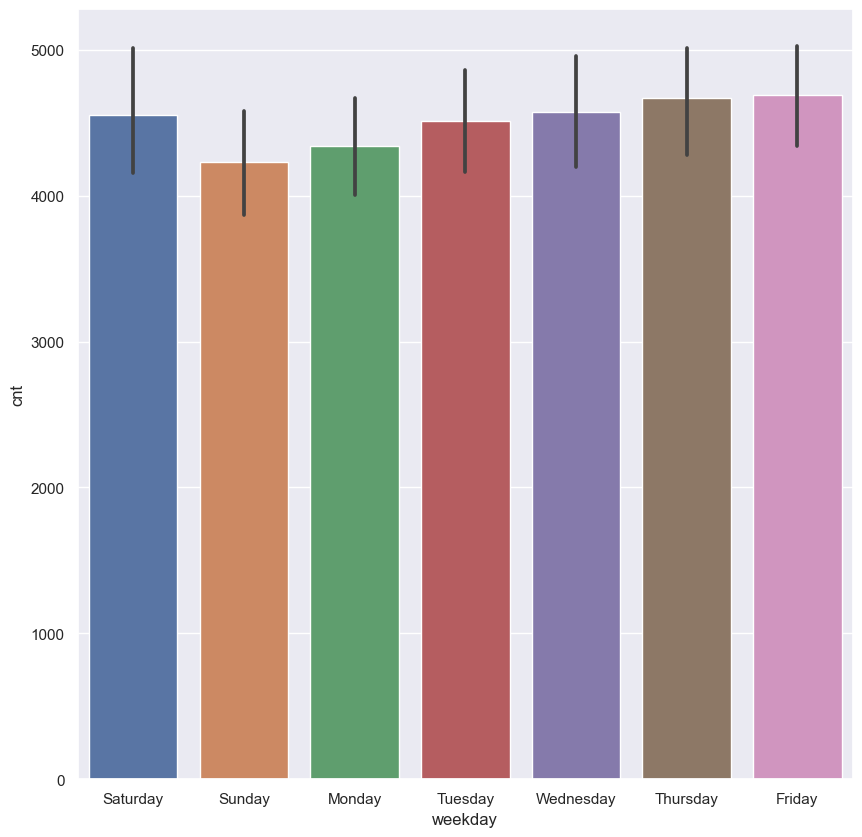

In [254]:
sns.barplot(data = bikesharedf,x='weekday', y='cnt')

<Axes: xlabel='atemp', ylabel='cnt'>

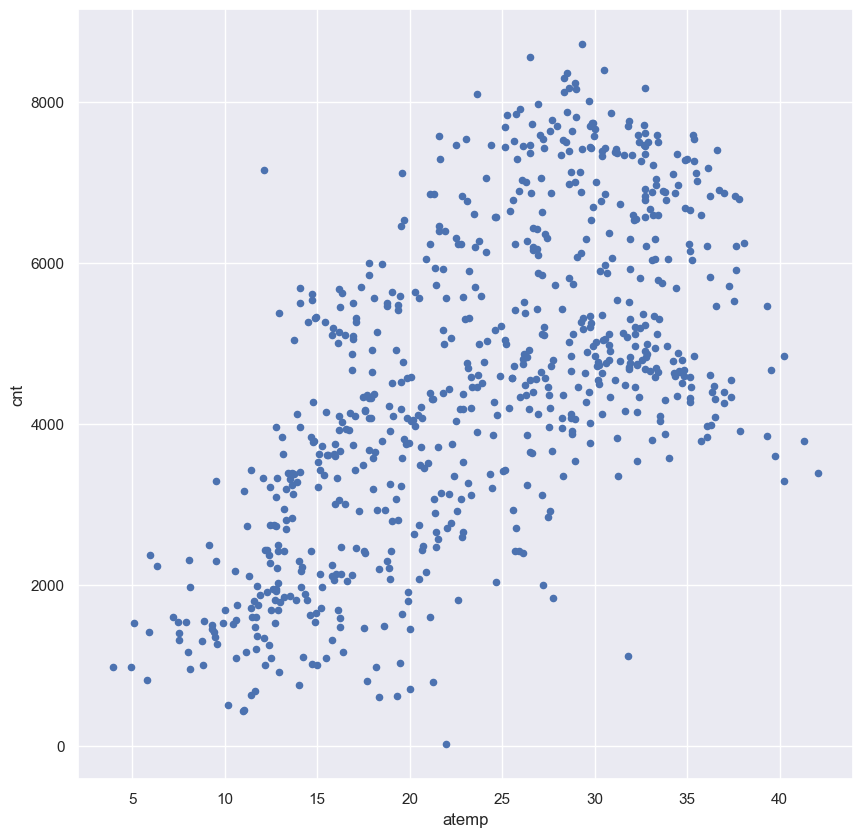

In [255]:
bikesharedf.plot.scatter(x='atemp', y='cnt')

<Axes: xlabel='hum', ylabel='cnt'>

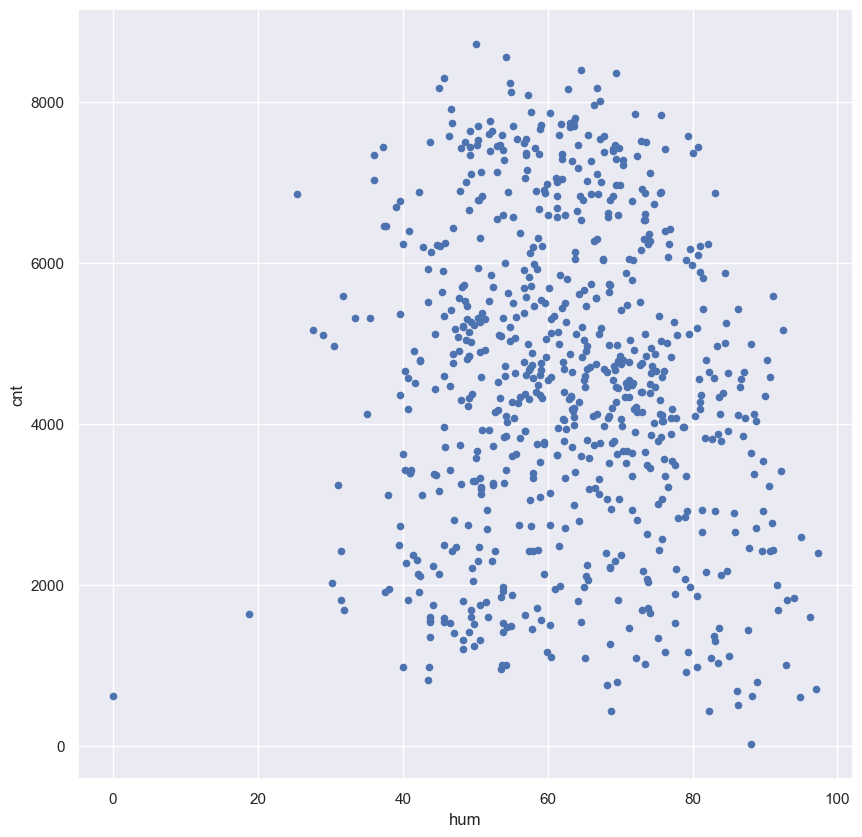

In [256]:
bikesharedf.plot.scatter(x='hum', y='cnt')

<Axes: xlabel='windspeed', ylabel='cnt'>

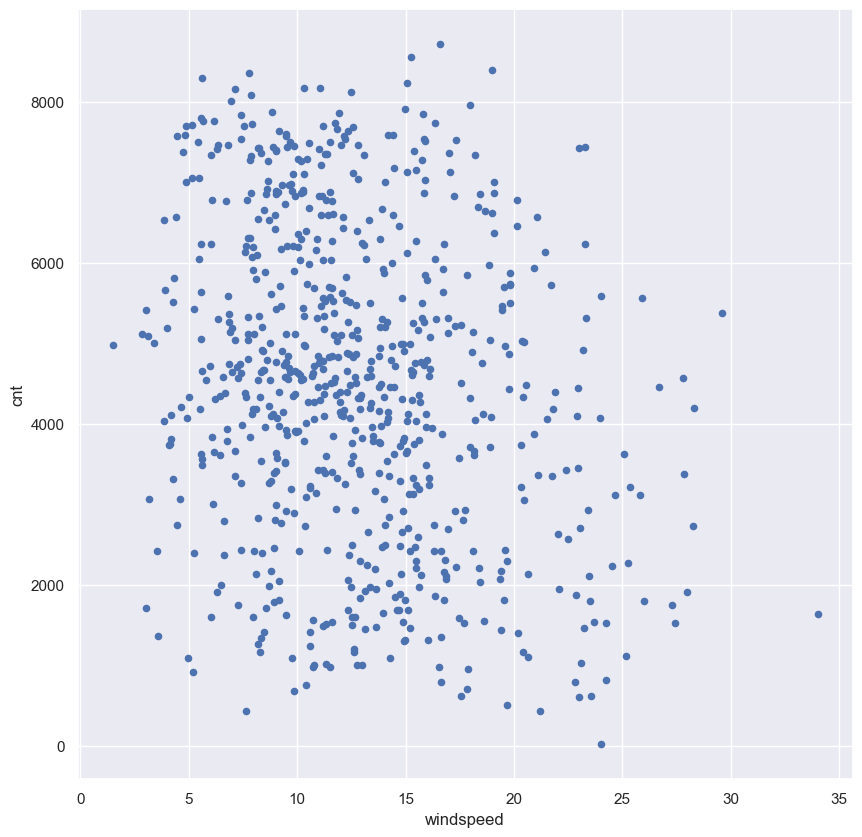

In [257]:
bikesharedf.plot.scatter(x='windspeed', y='cnt')

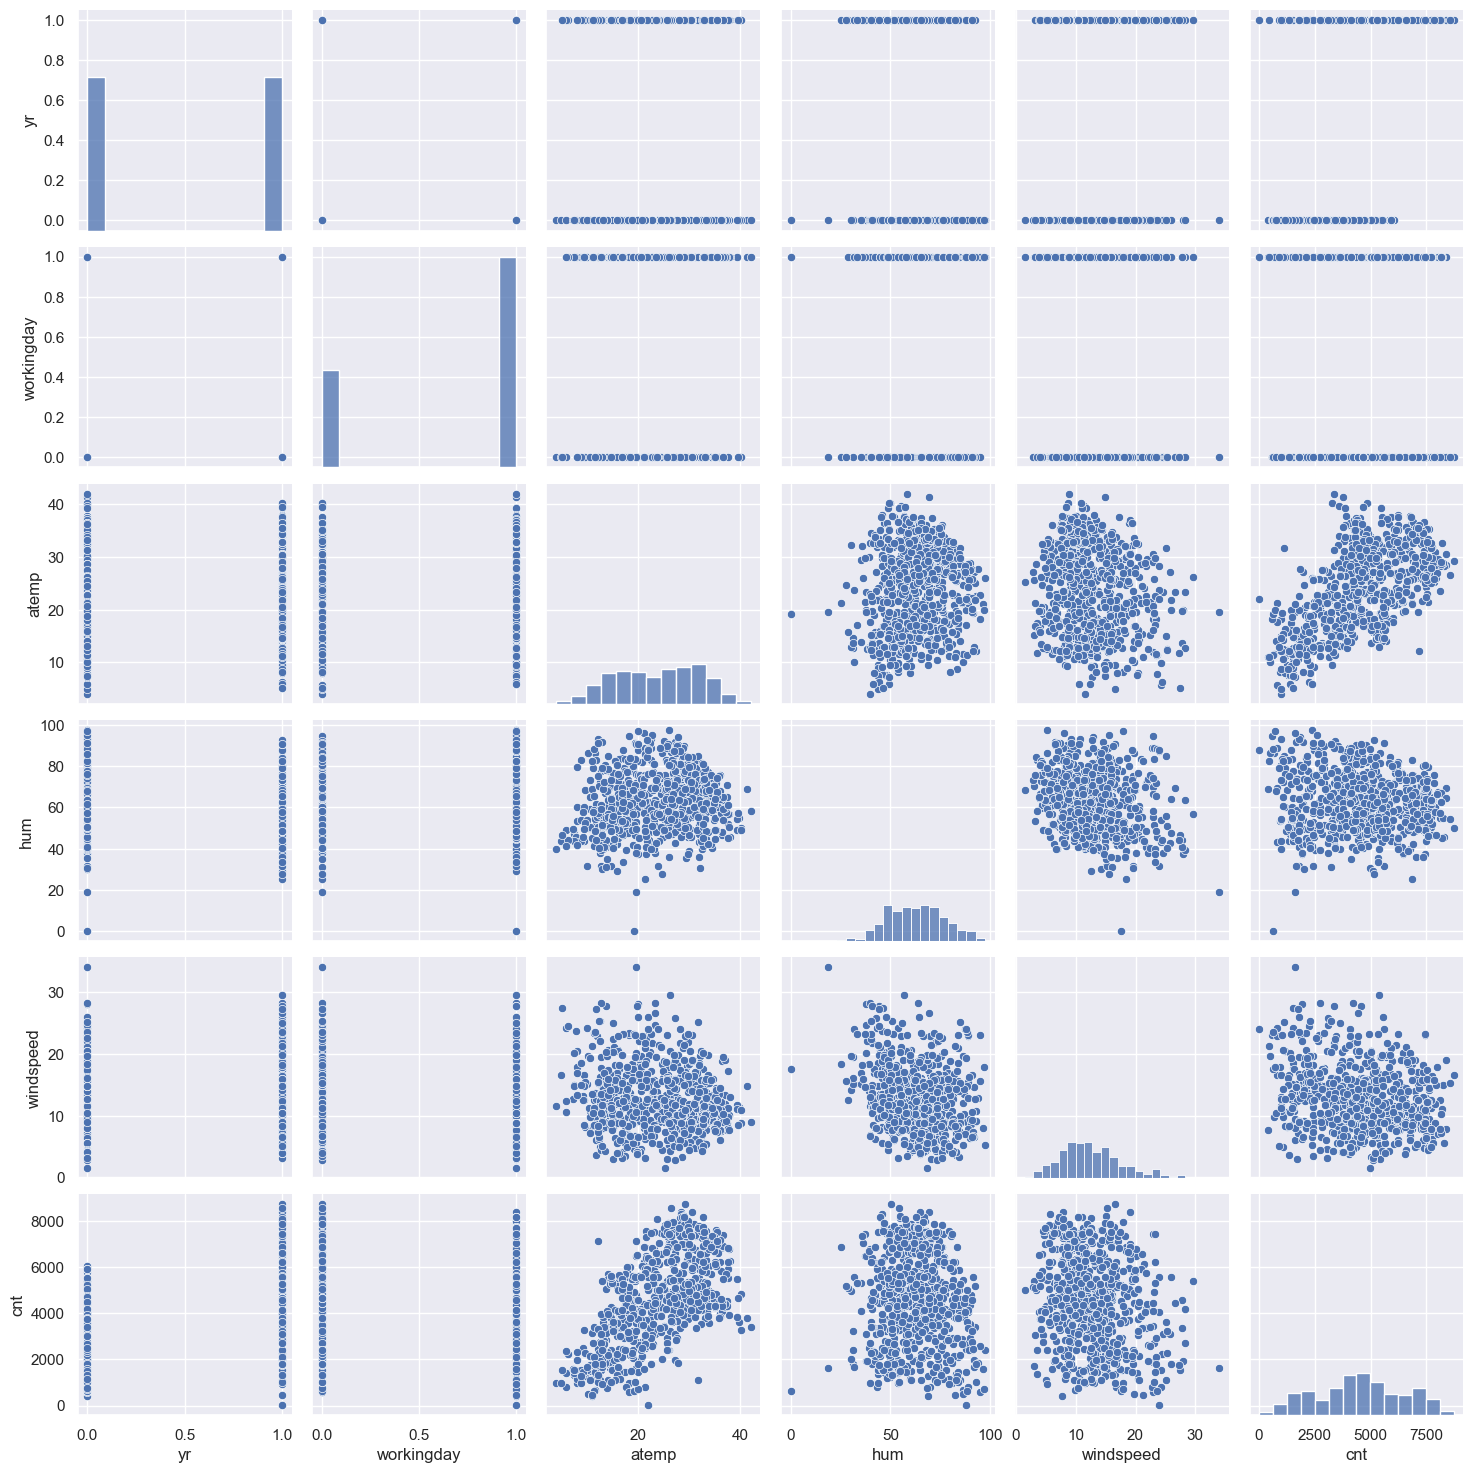

In [258]:
#Visulaising the numeric variables
sns.pairplot(bikesharedf)
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

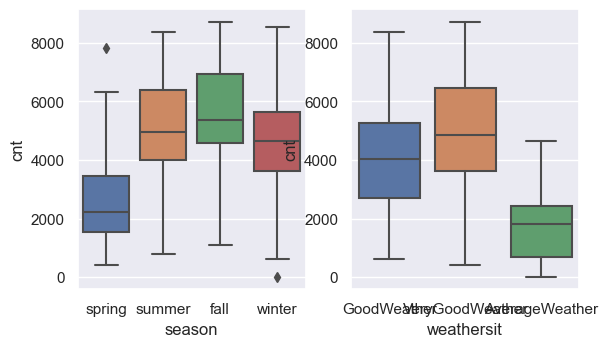

In [259]:
#Visualising categorical variables
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x='season', y = 'cnt', data = bikesharedf)
plt.subplot(2,3,2)
sns.boxplot(x='weathersit', y = 'cnt', data = bikesharedf)

In [260]:
bikeshareseasondummy = pd.get_dummies(bikesharedf['season'],drop_first = True)
bikeshareseasondummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [261]:
bikesharewthrdummy = pd.get_dummies(bikesharedf['weathersit'],drop_first = True)
bikesharewthrdummy.head()

,GoodWeather,VeryGoodWeather
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [262]:
bikesharewkdydummy = pd.get_dummies(bikesharedf['weekday'],drop_first = True)
bikesharewkdydummy.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [263]:
bikesharedf = pd.concat([bikesharedf, bikeshareseasondummy, bikesharewthrdummy, bikesharewkdydummy], axis =1)
bikesharedf.head(10)

,season,yr,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,GoodWeather,VeryGoodWeather,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Saturday,0,GoodWeather,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,1,0,0,0,0
1,spring,0,Sunday,0,GoodWeather,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,1,0,0,0
2,spring,0,Monday,1,VeryGoodWeather,9.47025,43.7273,16.636703,1349,1,0,0,0,1,1,0,0,0,0,0
3,spring,0,Tuesday,1,VeryGoodWeather,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,1,0
4,spring,0,Wednesday,1,VeryGoodWeather,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,1
5,spring,0,Thursday,1,VeryGoodWeather,11.66045,51.8261,6.000868,1606,1,0,0,0,1,0,0,0,1,0,0
6,spring,0,Friday,1,GoodWeather,10.44195,49.8696,11.304642,1510,1,0,0,1,0,0,0,0,0,0,0
7,spring,0,Saturday,0,GoodWeather,8.11270,53.5833,17.875868,959,1,0,0,1,0,0,1,0,0,0,0
8,spring,0,Sunday,0,VeryGoodWeather,5.80875,43.4167,24.250650,822,1,0,0,0,1,0,0,1,0,0,0
9,spring,0,Monday,1,VeryGoodWeather,7.54440,48.2917,14.958889,1321,1,0,0,0,1,1,0,0,0,0,0


In [264]:
bikesharedf = bikesharedf.drop(['season','weathersit','weekday'], axis=1)
bikesharedf.head()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,GoodWeather,VeryGoodWeather,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,1,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,1,0,0,0
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,1,1,0,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,1,0
4,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,1


In [265]:
##Splitting Dataset into TRaining set and Test set

dftrain, dftest = train_test_split(bikesharedf, train_size = 0.7, random_state = 100)
print(dftrain.shape)
print(dftest.shape)

(510, 17)
(220, 17)


In [266]:
##Rescaling the Features



scaler =  MinMaxScaler()

## to fit on training data
num_vars = ['atemp','hum','windspeed','cnt']

dftrain[num_vars] = scaler.fit_transform(dftrain[num_vars])

dftrain.head()

 



,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,GoodWeather,VeryGoodWeather,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,1,0
426,1,0,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,1,0,0,0
482,1,0,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,1,0,0,0,0
111,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,1,0,0,0,0,0,0,0


In [267]:
dftrain[num_vars].describe()

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.513156,0.650480,0.320883,0.513499
std,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.529718,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [268]:
##TRaining the model


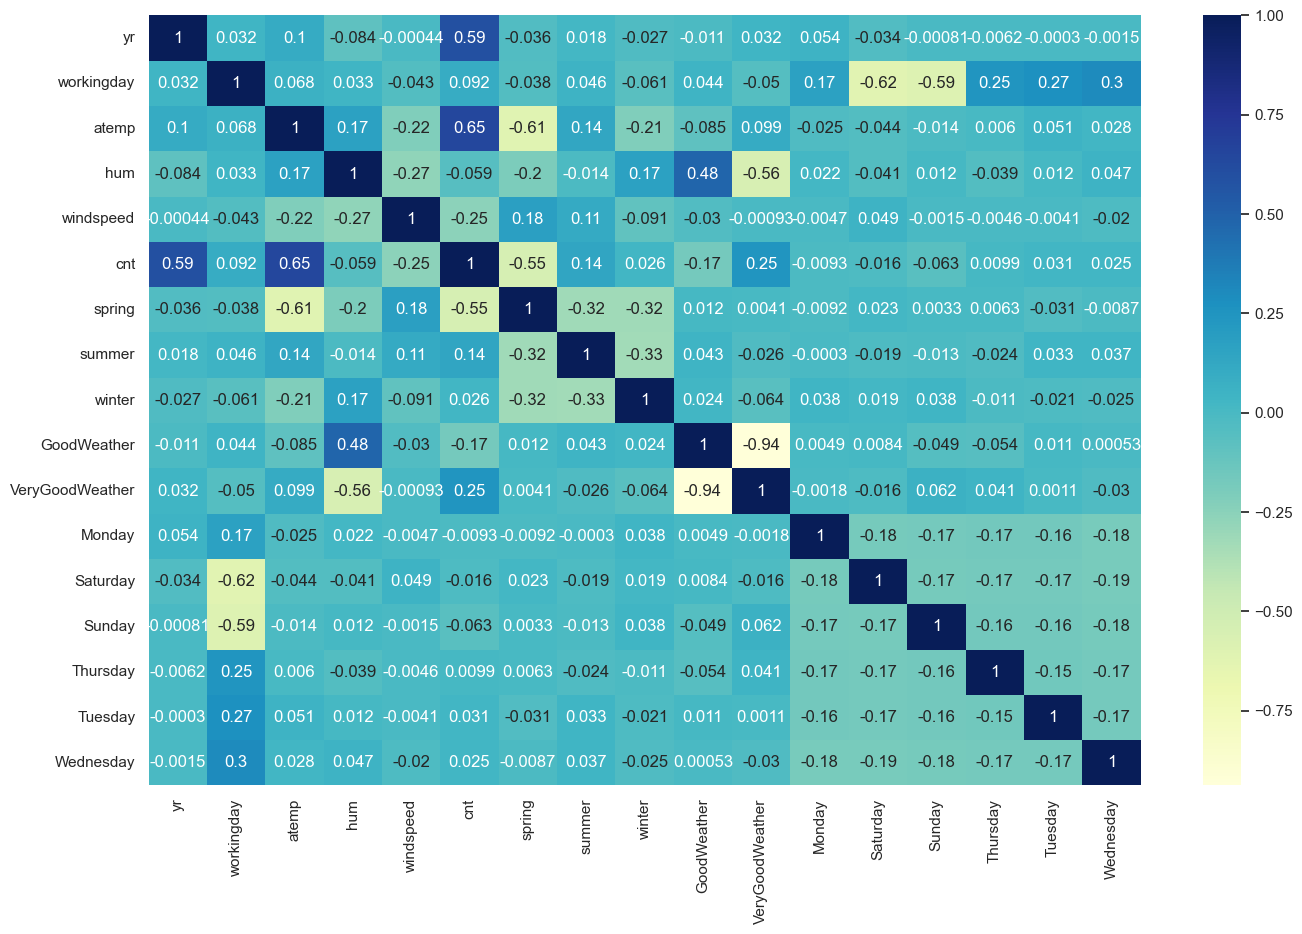

In [269]:
plt.figure(figsize=(16,10))
sns.heatmap(dftrain.corr(),annot=True,cmap= "YlGnBu")
plt.show()

In [270]:
y_train = dftrain.pop('cnt')
X_train=dftrain

In [271]:
X_train.head()

,yr,workingday,atemp,hum,windspeed,spring,summer,winter,GoodWeather,VeryGoodWeather,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,1,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,1,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,1,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,1,0,1,0,0,1,0,0,0,0
111,0,1,0.318819,0.751824,0.380981,0,1,0,1,0,0,0,0,0,0,0


In [272]:
##First Model with 'Feels like Temperature'

In [273]:


X_train_sm = sm.add_constant(X_train['atemp'])

In [274]:
lr= sm.OLS(y_train,X_train_sm)

In [275]:
lr_model = lr.fit()

In [276]:
lr_model.params

const    0.162201
atemp    0.684584
dtype: float64

In [277]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           4.77e-62
Time:                        10:56:30   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
##Second model with 'atemp' and 'year'

In [279]:
X_train_sm = X_train[['atemp','yr']]
X_train_sm = sm.add_constant(X_train_sm)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          3.98e-132
Time:                        10:56:41   Log-Likelihood:                 343.25
No. Observations:                 510   AIC:                            -680.5
Df Residuals:                     507   BIC:                            -667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0718      0.015      4.802      0.000       0.042       0.101
atemp          0.6259      0.026     24.092      0.000       0.575       0.677
yr             0.2373      0.011     21.524      0.000       0.216       0.259
==============================================================================
Omnibus:                       38.998   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.230
Skew:                          -0.546   Prob(JB):                     8.34e-14
Kurtosis:                       4.281   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
##Third Model
X_train_sm = X_train[['atemp','yr','spring']]
X_train_sm = sm.add_constant(X_train_sm)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     484.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          2.56e-148
Time:                        10:56:51   Log-Likelihood:                 384.19
No. Observations:                 510   AIC:                            -760.4
Df Residuals:                     506   BIC:                            -743.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1934      0.019     10.214      0.000       0.156       0.231
atemp          0.4520      0.030     14.908      0.000       0.392       0.512
yr             0.2407      0.010     23.618      0.000       0.221       0.261
spring        -0.1401      0.015     -9.388      0.000      -0.169      -0.111
==============================================================================
Omnibus:                      107.311   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.934
Skew:                          -1.007   Prob(JB):                     2.24e-67
Kurtosis:                       6.223   Cond. No.                         9.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
##Creating fourth model
X_train_sm = X_train[['atemp','yr','spring','windspeed']]
X_train_sm = sm.add_constant(X_train_sm)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     389.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          9.72e-153
Time:                        10:57:17   Log-Likelihood:                 397.69
No. Observations:                 510   AIC:                            -785.4
Df Residuals:                     505   BIC:                            -764.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2528      0.022     11.670      0.000       0.210       0.295
atemp          0.4307      0.030     14.437      0.000       0.372       0.489
yr             0.2418      0.010     24.330      0.000       0.222       0.261
spring        -0.1353      0.015     -9.284      0.000      -0.164      -0.107
windspeed     -0.1565      0.030     -5.240      0.000      -0.215      -0.098
==============================================================================
Omnibus:                       91.041   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.537
Skew:                          -0.904   Prob(JB):                     6.43e-50
Kurtosis:                       5.719   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
##Creating fifth model
X_train_sm = X_train[['atemp','yr','spring','windspeed','VeryGoodWeather']]
X_train_sm = sm.add_constant(X_train_sm)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     382.5
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          5.89e-169
Time:                        10:57:43   Log-Likelihood:                 438.63
No. Observations:                 510   AIC:                            -865.3
Df Residuals:                     504   BIC:                            -839.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2186      0.020     10.747      0.000       0.179       0.259
atemp               0.3977      0.028     14.316      0.000       0.343       0.452
yr                  0.2402      0.009     26.154      0.000       0.222       0.258
spring             -0.1455      0.014    -10.770      0.000      -0.172      -0.119
windspeed          -0.1605      0.028     -5.817      0.000      -0.215      -0.106
VeryGoodWeather     0.0890      0.010      9.369      0.000       0.070       0.108
==============================================================================
Omnibus:                       86.415   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.759
Skew:                          -0.799   Prob(JB):                     1.07e-56
Kurtosis:                       6.094   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
##Creating sixth model
X_train_sm = X_train[['atemp','yr','spring','windspeed','VeryGoodWeather','summer']]
X_train_sm = sm.add_constant(X_train_sm)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     318.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.13e-167
Time:                        10:57:51   Log-Likelihood:                 438.71
No. Observations:                 510   AIC:                            -863.4
Df Residuals:                     503   BIC:                            -833.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2174      0.021     10.544      0.000       0.177       0.258
atemp               0.3983      0.028     14.302      0.000       0.344       0.453
yr                  0.2401      0.009     26.125      0.000       0.222       0.258
spring             -0.1438      0.014    -10.078      0.000      -0.172      -0.116
windspeed          -0.1623      0.028     -5.790      0.000      -0.217      -0.107
VeryGoodWeather     0.0891      0.010      9.366      0.000       0.070       0.108
summer              0.0043      0.011      0.379      0.705      -0.018       0.027
==============================================================================
Omnibus:                       85.162   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.493
Skew:                          -0.789   Prob(JB):                     1.49e-55
Kurtosis:                       6.064   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
##Creating eight model
X_train_sm = X_train[['atemp','yr','spring','windspeed','VeryGoodWeather','summer','GoodWeather']]
X_train_sm = sm.add_constant(X_train_sm)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     308.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          2.94e-177
Time:                        10:58:31   Log-Likelihood:                 464.16
No. Observations:                 510   AIC:                            -912.3
Df Residuals:                     502   BIC:                            -878.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0426      0.031      1.371      0.171      -0.018       0.104
atemp               0.3885      0.027     14.628      0.000       0.336       0.441
yr                  0.2368      0.009     27.023      0.000       0.220       0.254
spring             -0.1542      0.014    -11.286      0.000      -0.181      -0.127
windspeed          -0.1414      0.027     -5.266      0.000      -0.194      -0.089
VeryGoodWeather     0.2684      0.026     10.202      0.000       0.217       0.320
summer             -0.0031      0.011     -0.288      0.774      -0.025       0.018
GoodWeather         0.1942      0.027      7.259      0.000       0.142       0.247
==============================================================================
Omnibus:                       64.013   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.046
Skew:                          -0.647   Prob(JB):                     2.91e-35
Kurtosis:                       5.411   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
##Creating tenth model
X_train_sm = X_train[['atemp','yr','spring','windspeed','VeryGoodWeather','summer','GoodWeather','workingday']]
X_train_sm = sm.add_constant(X_train_sm)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     273.0
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          3.19e-177
Time:                        11:01:09   Log-Likelihood:                 467.04
No. Observations:                 510   AIC:                            -916.1
Df Residuals:                     501   BIC:                            -878.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0275      0.032      0.873      0.383      -0.034       0.090
atemp               0.3847      0.026     14.525      0.000       0.333       0.437
yr                  0.2363      0.009     27.075      0.000       0.219       0.253
spring             -0.1550      0.014    -11.397      0.000      -0.182      -0.128
windspeed          -0.1390      0.027     -5.196      0.000      -0.192      -0.086
VeryGoodWeather     0.2709      0.026     10.335      0.000       0.219       0.322
summer             -0.0044      0.011     -0.401      0.689      -0.026       0.017
GoodWeather         0.1955      0.027      7.341      0.000       0.143       0.248
workingday          0.0222      0.009      2.385      0.017       0.004       0.040
==============================================================================
Omnibus:                       56.821   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.834
Skew:                          -0.545   Prob(JB):                     2.39e-34
Kurtosis:                       5.470   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:

##Checking VIF

vif = pd.DataFrame()
vif['Features']= X_train.columns
##vif = np.array(vif, dtype=float)
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])] 
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.08
1,workingday,22.63
2,atemp,20.40
9,VeryGoodWeather,16.91
8,GoodWeather,9.81
11,Saturday,6.55
12,Sunday,6.38
5,spring,4.91
4,windspeed,4.77
7,winter,3.44


In [292]:
##Removing hum
X = X_train.drop('hum', axis = 1)
X_train_sm = sm.add_constant(X)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     157.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          4.36e-177
Time:                        11:06:29   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -940.3
Df Residuals:                     494   BIC:                            -872.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0996      0.048     -2.057      0.040      -0.195      -0.004
yr                  0.2363      0.008     27.835      0.000       0.220       0.253
workingday          0.0802      0.028      2.867      0.004       0.025       0.135
atemp               0.4648      0.035     13.450      0.000       0.397       0.533
windspeed          -0.1379      0.026     -5.308      0.000      -0.189      -0.087
spring             -0.1020      0.020     -5.131      0.000      -0.141      -0.063
summer              0.0256      0.014      1.891      0.059      -0.001       0.052
winter              0.0586      0.016      3.660      0.000       0.027       0.090
GoodWeather         0.2025      0.026      7.774      0.000       0.151       0.254
VeryGoodWeather     0.2809      0.026     10.967      0.000       0.231       0.331
Monday             -0.0305      0.016     -1.863      0.063      -0.063       0.002
Saturday            0.0759      0.032      2.389      0.017       0.013       0.138
Sunday              0.0157      0.032      0.491      0.624      -0.047       0.078
Thursday           -0.0137      0.017     -0.829      0.407      -0.046       0.019
Tuesday            -0.0246      0.017     -1.485      0.138      -0.057       0.008
Wednesday          -0.0079      0.016     -0.496      0.620      -0.039       0.023
==============================================================================
Omnibus:                       72.721   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.335
Skew:                          -0.726   Prob(JB):                     1.55e-40
Kurtosis:                       5.553   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:

##Checking VIF

vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])] 
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,19.79
8,VeryGoodWeather,16.76
2,atemp,15.52
7,GoodWeather,9.56
10,Saturday,5.64
11,Sunday,5.42
3,windspeed,4.71
4,spring,4.32
6,winter,2.80
5,summer,2.37


In [294]:
##Removing workingday
X = X.drop('workingday', axis = 1)
X_train_sm = sm.add_constant(X)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     165.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.91e-176
Time:                        11:07:14   Log-Likelihood:                 481.95
No. Observations:                 510   AIC:                            -933.9
Df Residuals:                     495   BIC:                            -870.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0185      0.040     -0.467      0.641      -0.096       0.059
yr                  0.2369      0.009     27.726      0.000       0.220       0.254
atemp               0.4663      0.035     13.397      0.000       0.398       0.535
windspeed          -0.1392      0.026     -5.320      0.000      -0.191      -0.088
spring             -0.1032      0.020     -5.153      0.000      -0.143      -0.064
summer              0.0265      0.014      1.947      0.052      -0.000       0.053
winter              0.0572      0.016      3.550      0.000       0.026       0.089
GoodWeather         0.2006      0.026      7.650      0.000       0.149       0.252
VeryGoodWeather     0.2778      0.026     10.777      0.000       0.227       0.328
Monday             -0.0396      0.016     -2.449      0.015      -0.071      -0.008
Saturday           -0.0029      0.016     -0.179      0.858      -0.034       0.029
Sunday             -0.0630      0.016     -3.848      0.000      -0.095      -0.031
Thursday           -0.0147      0.017     -0.884      0.377      -0.047       0.018
Tuesday            -0.0234      0.017     -1.404      0.161      -0.056       0.009
Wednesday          -0.0068      0.016     -0.424      0.672      -0.038       0.025
==============================================================================
Omnibus:                       83.314   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.521
Skew:                          -0.800   Prob(JB):                     3.93e-50
Kurtosis:                       5.855   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
##Checking VIF

vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])] 
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,VeryGoodWeather,14.23
1,atemp,12.43
6,GoodWeather,7.92
2,windspeed,4.58
3,spring,3.81
5,winter,2.48
4,summer,2.23
13,Wednesday,2.13
9,Saturday,2.11
8,Monday,2.09


In [296]:
##Removing VeryGoodWeather
X = X.drop('VeryGoodWeather', axis = 1)
X_train_sm = sm.add_constant(X)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     137.5
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          5.35e-155
Time:                        11:07:43   Log-Likelihood:                 428.20
No. Observations:                 510   AIC:                            -828.4
Df Residuals:                     496   BIC:                            -769.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2474      0.034      7.196      0.000       0.180       0.315
yr              0.2421      0.009     25.562      0.000       0.223       0.261
atemp           0.4836      0.039     12.530      0.000       0.408       0.559
windspeed      -0.1664      0.029     -5.756      0.000      -0.223      -0.110
spring         -0.0909      0.022     -4.096      0.000      -0.135      -0.047
summer          0.0331      0.015      2.193      0.029       0.003       0.063
winter          0.0513      0.018      2.868      0.004       0.016       0.086
GoodWeather    -0.0648      0.010     -6.486      0.000      -0.084      -0.045
Monday         -0.0449      0.018     -2.504      0.013      -0.080      -0.010
Saturday       -0.0107      0.018     -0.601      0.548      -0.046       0.024
Sunday         -0.0640      0.018     -3.517      0.000      -0.100      -0.028
Thursday       -0.0244      0.018     -1.324      0.186      -0.061       0.012
Tuesday        -0.0264      0.019     -1.429      0.154      -0.063       0.010
Wednesday      -0.0229      0.018     -1.294      0.196      -0.058       0.012
==============================================================================
Omnibus:                      130.250   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.406
Skew:                          -1.161   Prob(JB):                     6.33e-96
Kurtosis:                       6.904   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
##Checking VIF

vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])] 
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.74
2,windspeed,4.50
3,spring,2.39
12,Wednesday,2.11
8,Saturday,2.07
0,yr,2.06
7,Monday,2.04
9,Sunday,2.01
4,summer,1.93
11,Tuesday,1.93


In [298]:
##Removing atemp
X = X.drop('atemp', axis = 1)
X_train_sm = sm.add_constant(X)
lr= sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     103.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.30e-126
Time:                        11:08:08   Log-Likelihood:                 358.08
No. Observations:                 510   AIC:                            -690.2
Df Residuals:                     497   BIC:                            -635.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6141      0.021     29.718      0.000       0.574       0.655
yr              0.2546      0.011     23.578      0.000       0.233       0.276
windspeed      -0.2073      0.033     -6.296      0.000      -0.272      -0.143
spring         -0.3104      0.016    -19.872      0.000      -0.341      -0.280
summer         -0.0529      0.015     -3.432      0.001      -0.083      -0.023
winter         -0.0989      0.015     -6.506      0.000      -0.129      -0.069
GoodWeather    -0.0744      0.011     -6.510      0.000      -0.097      -0.052
Monday         -0.0450      0.021     -2.188      0.029      -0.085      -0.005
Saturday       -0.0105      0.020     -0.513      0.608      -0.051       0.030
Sunday         -0.0592      0.021     -2.843      0.005      -0.100      -0.018
Thursday       -0.0228      0.021     -1.078      0.282      -0.064       0.019
Tuesday        -0.0174      0.021     -0.822      0.412      -0.059       0.024
Wednesday      -0.0159      0.020     -0.784      0.433      -0.056       0.024
==============================================================================
Omnibus:                       70.501   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.732
Skew:                          -0.714   Prob(JB):                     3.10e-38
Kurtosis:                       5.467   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
##Checking VIF

vif = pd.DataFrame()
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])] 
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.06
2,spring,1.93
3,summer,1.92
0,yr,1.89
4,winter,1.81
6,Monday,1.62
7,Saturday,1.62
11,Wednesday,1.59
8,Sunday,1.56
10,Tuesday,1.49


In [300]:
## Residual Analysis

y_train_pred = lr_model.predict(X_train_sm)



<Axes: ylabel='Density'>

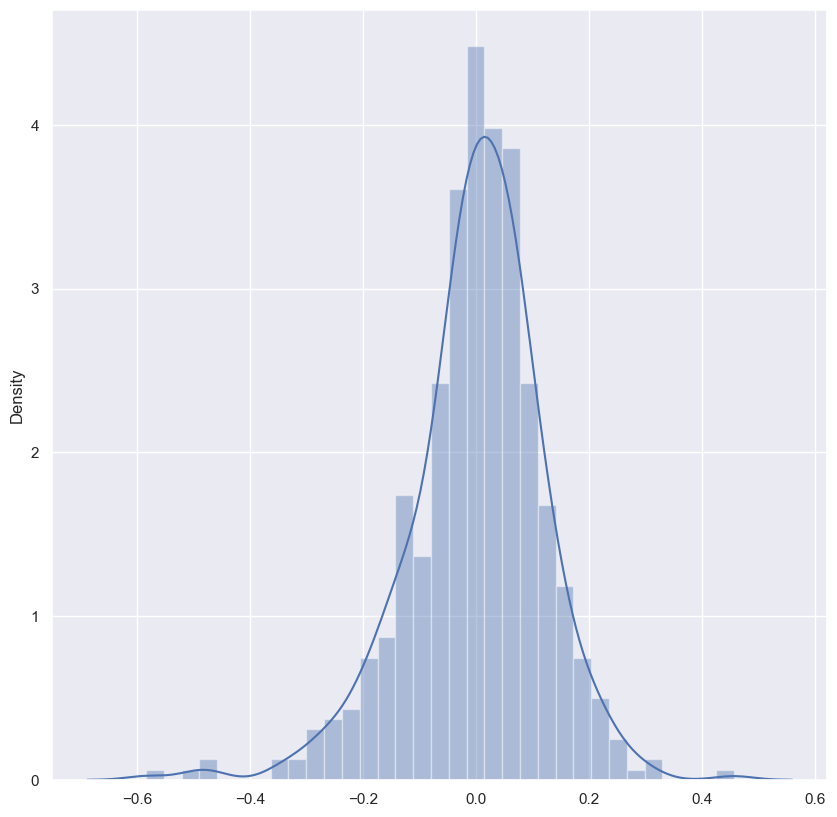

In [301]:
res = y_train - y_train_pred
sns.distplot(res)

In [302]:
#Predictions on Test set

## to fit on training data
num_vars = ['atemp','hum','windspeed','cnt']

dftest[num_vars] = scaler.transform(dftest[num_vars])

dftest.head()

 

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,GoodWeather,VeryGoodWeather,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,0,0.769660,0.657364,0.084219,0.692706,0,0,0,1,0,1,0,0,0,0,0
535,1,1,0.842587,0.610133,0.153728,0.712034,0,1,0,0,1,0,0,0,0,0,1
299,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,1,0,0,0,0,1,0,0
221,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,1
152,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,0,1,0,0,0,1,0,0


In [303]:
dftest.describe()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,GoodWeather,VeryGoodWeather,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.318182,0.654545,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.466833,0.476601,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [305]:
y_test = dftest.pop('cnt')
X_test = dftest

In [307]:
#adding constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,atemp,hum,windspeed,spring,summer,winter,GoodWeather,VeryGoodWeather,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,1.0,0,0,0.769660,0.657364,0.084219,0,0,0,1,0,1,0,0,0,0,0
535,1.0,1,1,0.842587,0.610133,0.153728,0,1,0,0,1,0,0,0,0,0,1
299,1.0,0,1,0.496145,0.837699,0.334206,0,0,1,1,0,0,0,0,1,0,0
221,1.0,0,1,0.795343,0.437098,0.339570,0,0,0,0,1,0,0,0,0,0,1
152,1.0,0,1,0.741471,0.314298,0.537414,0,1,0,0,1,0,0,0,1,0,0


In [308]:
X_test_sm = X_test_sm.drop(['atemp','hum','VeryGoodWeather','workingday'],axis = 1)

In [311]:
y_test_pred = lr_model.predict(X_test_sm)

In [312]:
#Evaluate the model
r2_score(y_true = y_test, y_pred = y_test_pred)

0.702534291855474